In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import shutil   
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

from keras.callbacks import ModelCheckpoint
# from keras.layers import LeakyReLU
# from keras.layers.normalization import batch_normalization
# keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, 
#                                 scale=True, beta_initializer='zeros', gamma_initializer='ones',
#                                 moving_mean_initializer='zeros', moving_variance_initializer='ones', 
#                                 beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, 
#                                 gamma_constraint=None)

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
train = 'c:/Users/jadha/Data/MTP_data_underwater_agumented1/Train'
val = 'c:/Users/jadha/Data/MTP_data_underwater_agumented1/Val'
test = 'c:/Users/jadha/Data/MTP_data_underwater_agumented1/Test'

In [3]:
# Total number of training images
num_of_train_samples = 0
for train_dataset in os.listdir(train):
    in_folder = train + "/" + train_dataset 
    in_folder_list = os.listdir(in_folder)
    num_of_train_samples = num_of_train_samples + len(in_folder_list)
print("Number of Training samples   : ",num_of_train_samples)

# Total number of validation images
num_of_validation_samples = 0
for validation_dataset in os.listdir(val):
    in_folder_val = val + "/" + validation_dataset
    in_folder_val_list = os.listdir(in_folder_val)
    num_of_validation_samples = num_of_validation_samples + len(in_folder_val_list)
print("Number of Validation samples : ", num_of_validation_samples)

# Total number of testing images
num_of_test_samples = 0
for testing_dataset in os.listdir(test):
    in_folder_test = test + "/" + testing_dataset
    in_folder_test_list = os.listdir(in_folder_test)
    num_of_test_samples = num_of_test_samples + len(in_folder_test_list)
print("Number of Test samples : ", num_of_test_samples)

Number of Training samples   :  893
Number of Validation samples :  235
Number of Test samples :  140


In [4]:
for validation_dataset in os.listdir(train):
    print(validation_dataset)

Catla
Mrigal
Rohu
Tilapia
Tuna


In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
batch_size = 64
learning_rate = 0.01
epoch = 50

# Defining image width and height respectively
img_rows = 224
img_cols = 224

In [8]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(val,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

Found 893 images belonging to 5 classes.
Found 235 images belonging to 5 classes.
Found 140 images belonging to 5 classes.


In [9]:
px=train_generator[4][0][7]
px

array([[[0.55955154, 0.5634731 , 0.49372748],
        [0.644786  , 0.6478553 , 0.58539426],
        [0.6161271 , 0.6084309 , 0.54916656],
        ...,
        [0.23341656, 0.2412597 , 0.22165185],
        [0.24246927, 0.25190687, 0.23548798],
        [0.25386897, 0.26583982, 0.25448745]],

       [[0.5694446 , 0.5741831 , 0.5011439 ],
        [0.6232046 , 0.62712616, 0.56247276],
        [0.62441707, 0.61984795, 0.55993307],
        ...,
        [0.26430213, 0.2785915 , 0.27187613],
        [0.26547468, 0.28400183, 0.28008026],
        [0.25407502, 0.27893528, 0.27501372]],

       [[0.60040146, 0.60637826, 0.5296242 ],
        [0.5922477 , 0.5961693 , 0.5290393 ],
        [0.6343233 , 0.633469  , 0.5723158 ],
        ...,
        [0.2436418 , 0.2742983 , 0.27037674],
        [0.23156388, 0.26719713, 0.26395378],
        [0.21763095, 0.2545308 , 0.25382072]],

       ...,

       [[0.52978295, 0.66524655, 0.7381506 ],
        [0.51711667, 0.66018003, 0.7343507 ],
        [0.514653  , 0

In [10]:
px.shape

(224, 224, 3)

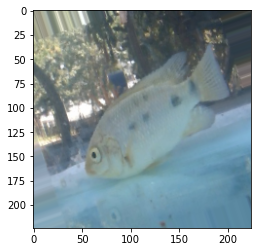

In [11]:
plt.imshow(px)

In [12]:
test_generator.dtype

'float32'

In [13]:
# for i in test_generator:
#         print(i)
test_generator[0][-1]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0.

In [14]:
steps_per_epoch_inc = num_of_train_samples // batch_size
print("Steps per epoch: ",steps_per_epoch_inc)

Steps per epoch:  13


# Create model
add new classification layer

In [15]:
from keras.applications import InceptionV3
# The sequential API allows us to create model layer by layer
inc_model = Sequential()
inc_model.add(InceptionV3(include_top=False, 
                      pooling='max',
                      weights='imagenet'))
# inc_model.add(Dense(32, activation="relu"))

inc_model.add(Dense(5, activation="softmax"))

# Summary: to find the number of parameters
inc_model.layers[0].trainable=False
inc_model.summary()

adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
inc_model.compile(loss="categorical_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [16]:

# # Define the checkpoint callback
# checkpoint_path = 'model_weights.{epoch:02d}-{val_accuracy:.2f}.h5'
# checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True)


In [17]:
# from keras.callbacks import EarlyStopping

# # Create an EarlyStopping callback to stop training early if the validation loss fails to improve after 5 epochs
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=25)


In [18]:
from keras.callbacks import LearningRateScheduler

# Define a learning rate schedule function
def lr_schedule(epoch):
    if epoch < 10:
        return 0.01
    elif epoch < 30:
        return 0.001
    else:
        return 0.0001

# Create a LearningRateScheduler callback using the lr_schedule function
lr_schedule_callback = LearningRateScheduler(lr_schedule)

In [32]:
inc_training = inc_model.fit_generator(train_generator,
                                       epochs = epoch,
                                      validation_data = validation_generator)

Epoch 1/50
14/14 [==============================] - 33s 2s/step - loss: 0.6382 - accuracy: 0.8746 - val_loss: 1.4564 - val_accuracy: 0.7660
Epoch 2/50
14/14 [==============================] - 30s 2s/step - loss: 0.6563 - accuracy: 0.8903 - val_loss: 1.5379 - val_accuracy: 0.7277
Epoch 3/50
14/14 [==============================] - 31s 2s/step - loss: 0.4926 - accuracy: 0.8869 - val_loss: 1.6927 - val_accuracy: 0.7106
Epoch 4/50
14/14 [==============================] - 32s 2s/step - loss: 0.2587 - accuracy: 0.9306 - val_loss: 1.0656 - val_accuracy: 0.7617
Epoch 5/50
14/14 [==============================] - 32s 2s/step - loss: 0.2840 - accuracy: 0.9261 - val_loss: 1.0200 - val_accuracy: 0.7915
Epoch 6/50
14/14 [==============================] - 32s 2s/step - loss: 0.2710 - accuracy: 0.9216 - val_loss: 1.1089 - val_accuracy: 0.7702
Epoch 7/50
14/14 [==============================] - 33s 2s/step - loss: 0.3877 - accuracy: 0.9115 - val_loss: 1.2618 - val_accuracy: 0.7915
Epoch 8/50
14/14 [==

In [33]:
# inc_model.save_weights('final_model_weights.h5')

# Training accuracy

In [34]:
inc_model.evaluate(train_generator)

14/14 [==============================] - 25s 2s/step - loss: 0.3302 - accuracy: 0.9261


[0.3301561772823334, 0.9260918498039246]

# Validation accuracy

In [35]:
inc_model.evaluate(validation_generator)

4/4 [==============================] - 6s 1s/step - loss: 1.9494 - accuracy: 0.7319


[1.949422836303711, 0.7319148778915405]

# Testing accuracy

In [36]:
inc_model.evaluate(test_generator)

3/3 [==============================] - 4s 960ms/step - loss: 0.8462 - accuracy: 0.7714


[0.8462292551994324, 0.7714285850524902]

# Prediction

In [37]:
predictions=inc_model.predict(test_generator)
predictions

3/3 [==============================] - 4s 919ms/step


array([[1.41213334e-03, 2.48362869e-03, 9.95748818e-01, 3.55502707e-04,
        3.49520179e-19],
       [2.47853145e-01, 3.91255071e-06, 1.96547985e-01, 5.55595040e-01,
        8.06933234e-20],
       [9.97168958e-01, 6.10119073e-12, 2.82855495e-03, 2.46116497e-06,
        4.59939924e-19],
       [1.00000000e+00, 3.81424865e-14, 1.90934664e-11, 6.68199496e-10,
        4.49074442e-29],
       [9.99778211e-01, 4.17929255e-13, 2.21856593e-04, 3.37629757e-10,
        1.51512570e-26],
       [2.83329817e-03, 1.11744791e-01, 8.85277033e-01, 1.44894861e-04,
        5.46983933e-19],
       [9.99855876e-01, 6.37259427e-06, 1.35679205e-04, 2.12759278e-06,
        1.05546969e-16],
       [4.55722325e-02, 7.85322118e-06, 9.54419971e-01, 6.88624768e-10,
        1.83423785e-18],
       [8.72270167e-01, 5.01160059e-07, 1.27720952e-01, 8.45327850e-06,
        2.58923811e-16],
       [3.82052665e-03, 5.31364503e-06, 9.96174157e-01, 3.64666234e-15,
        4.31463429e-25],
       [6.72863424e-01, 1.7836

In [38]:
np.argmax(predictions[19])

2

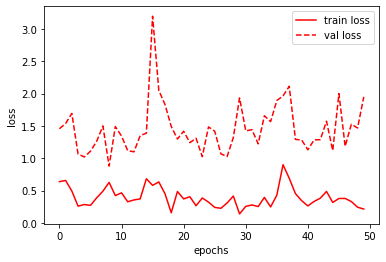

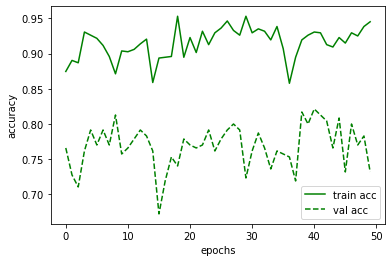

In [39]:
plt.plot(inc_training.history['loss'], label='train loss',color='r')
plt.plot(inc_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(inc_training.history['accuracy'], label='train acc',color='g')
plt.plot(inc_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
# plt.savefig('AccVal_acc')

In [40]:
training_accuracy_inc      = inc_training.history['accuracy'][-1]
training_loss_inc          = inc_training.history['loss'][-1]
validation_accuracy_inc    = inc_training.history['val_accuracy'][-1]
validation_loss_inc        = inc_training.history['val_loss'][-1]
print("Training Accuracy Inception   :", training_accuracy_inc )
print("Training Loss Inception       :", training_loss_inc)
print("Validation Accuracy Inception :", validation_accuracy_inc)
print("Validation Loss Inception     :", validation_loss_inc)

Training Accuracy Inception   : 0.9451287984848022
Training Loss Inception       : 0.21419179439544678
Validation Accuracy Inception : 0.7319148778915405
Validation Loss Inception     : 1.949422836303711


In [41]:
for validation_dataset in os.listdir(train):
    print(validation_dataset)

Catla
Mrigal
Rohu
Tilapia
Tuna


In [42]:
# Generating Confusion Matrix and Classification Report
Y_pred_inc = inc_model.predict_generator(test_generator, num_of_test_samples // batch_size+1)
y_pred_inc = np.argmax(Y_pred_inc, axis=1)
print('Confusion Matrix')
conf_matrix_inc = confusion_matrix(test_generator.classes, y_pred_inc)
cm_inc = np.array2string(conf_matrix_inc)
print(conf_matrix_inc)
print("**=============================================================================================**")
print('Classification Report')
target_names = ['Catla','Mrigal','Rohu','Tilapia','Tuna']
class_rep_inc = classification_report(test_generator.classes, y_pred_inc, target_names=target_names)
print(class_rep_inc)

Confusion Matrix
[[23  0 19  2  0]
 [ 0  8  3  1  0]
 [ 1  2 22  3  0]
 [ 0  0  0 48  0]
 [ 0  0  0  1  7]]
**=============================================================================================**
Classification Report
              precision    recall  f1-score   support

       Catla       0.96      0.52      0.68        44
      Mrigal       0.80      0.67      0.73        12
        Rohu       0.50      0.79      0.61        28
     Tilapia       0.87      1.00      0.93        48
        Tuna       1.00      0.88      0.93         8

    accuracy                           0.77       140
   macro avg       0.83      0.77      0.78       140
weighted avg       0.83      0.77      0.77       140



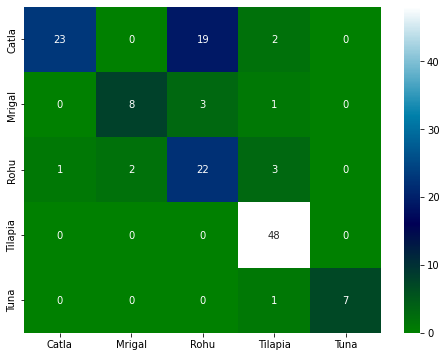

In [43]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_inc, annot=True, cmap='ocean',xticklabels=target_names,yticklabels=target_names)
plt.show()

In [44]:
accuracy_score(test_generator.classes, y_pred_inc)

0.7714285714285715

# predicting single image

In [56]:
import cv2 as cv

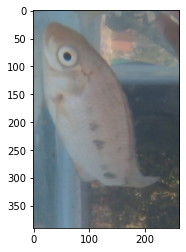

In [57]:
fish_img=plt.imread("c:/Users/jadha/Data/MTP_data_underwater/Test/Tilapia/020.jpg")
plt.imshow(fish_img)
plt.show()

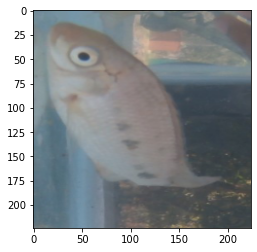

In [58]:
fish_img=cv.resize(fish_img,(224,224))
plt.imshow(fish_img)
plt.show()

In [59]:
fish_img.shape

(224, 224, 3)

In [60]:
fish_img=fish_img.reshape(224,224,3)
fish_img.shape

(224, 224, 3)

In [61]:
from tensorflow.keras.preprocessing import image

In [62]:
x=image.img_to_array(fish_img)
x=np.expand_dims(x,axis=0)

In [63]:
inc_model.predict(x)

1/1 [==============================] - 1s 1s/step


array([[0., 1., 0., 0.]], dtype=float32)

In [64]:
fish=['Catla','Rohu','Tilapia','Tuna']
pridicted_fish=fish[np.argmax(inc_model.predict(x)[0])]
pridicted_fish

1/1 [==============================] - 0s 61ms/step


'Rohu'

# Deployment

In [17]:
# Trains the model for a given number of epochs (iterations on a dataset).
inc_training = inc_model.fit_generator(train_generator,
                                       steps_per_epoch = steps_per_epoch_inc,
                                       epochs = epoch,
                                       validation_data = validation_generator,
                                       validation_steps = num_of_validation_samples // batch_size)

Epoch 1/60
30/30 [==============================] - 234s 8s/step - loss: 2.1564 - accuracy: 0.4296 - val_loss: 1.2129 - val_accuracy: 0.5703
Epoch 2/60


KeyboardInterrupt: 

# outside image prediction


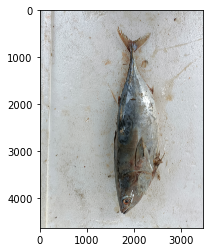

In [24]:
import matplotlib.pyplot as plt
import cv2 as cv
px=plt.imread('c:/Users/jadha/Data/MTP_data/Train/Tuna/009 (10).jpg')
plt.imshow(px)
plt.show()

In [25]:
test_img = test_datagen.flow_from_directory(test,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

Found 35 images belonging to 4 classes.


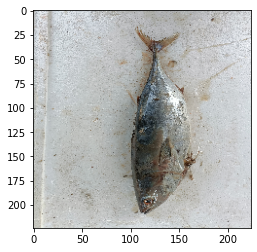

In [26]:
fish_px = cv.resize(px,(224,224))
plt.imshow(fish_px)
plt.show()

In [38]:
inc_model.predict(fish_px,batch_size=32)

ValueError: in user code:

    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "inception_v3" (type Functional).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 224, 3)
    
    Call arguments received by layer "inception_v3" (type Functional):
      • inputs=tf.Tensor(shape=(32, 224, 3), dtype=float32)
      • training=False
      • mask=None


In [33]:
fish_px.shape

(224, 224, 3)

In [35]:
fish_px=fish_px.reshape(224,224,3)
fish_px.shape

(224, 224, 3)

In [29]:
224*224

50176

In [30]:
fish_px=fish_px* 1./225

In [31]:
inc_model.predict(fish_px)

ValueError: in user code:

    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jadha\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "inception_v3" (type Functional).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (32, 224, 3)
    
    Call arguments received by layer "inception_v3" (type Functional):
      • inputs=tf.Tensor(shape=(32, 224, 3), dtype=float32)
      • training=False
      • mask=None
